# Fashion MNIST 실습 소개
## 목표
의류 이미지를 보고 어떤 종류의 의류인지 분류하는 분류기의 성능을 높여주세요

## 방법
Part #1에서 학습한 모든 기법과 내용을 Tensorflow로 실습해볼 수 있는 코드입니다.

# 데이터셋 소개
## Fasion MNIST
https://github.com/zalandoresearch/fashion-mnist

## Why not MNIST?
1. MNIST is too easy.  
Convolutional nets can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%.
2. MNIST is overused.  
Almost everyone who has experience with deep learning has come across MNIST at least once.
3. MNIST cannot represent modern CV tasks.  
This was noted by François Chollet, the author of the Keras library.

## Overview
* The Fashion MNIST training set contains 55,000 examples, 
* and the test set contains 10,000 examples.
* Each example is a 28x28 grayscale image (just like the images in the original MNIST), 
* associated with a label from 10 classes

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top (티셔츠/탑) |
| 1 | Trouser (바지) |
| 2 | Pullover (스웨터) |
| 3 | Dress (드레스) |
| 4 | Coat (코트) |
| 5 | Sandal (샌달) |
| 6 | Shirt (셔츠) |
| 7 | Sneaker (신발-스니커즈) |
| 8 | Bag (가방) |
| 9 | Ankle boot (짧은 부츠) |

In [1]:
# 파이선 행렬 연산에 주로 사용하는 라이브러리
import numpy as np
# 파이선에서 챠트 그리기에 주로 사용하는 라이브러리
import matplotlib.pyplot as plt
# 텐서플로우! 예~!
import tensorflow as tf
# 텐서플로우의 MNIST 데이터 Load Helper
from tensorflow.examples.tutorials.mnist import input_data

# matplotlib의 챠트 이미지가 ipython notebook에서 출력되도록 하는 옵션
%matplotlib inline

/Users/olaf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Fashion MNIST 이미지 데이터를 로드합니다. 
# ㄴ 이미지 파일은 fashion-data 폴더에 받아놓았습니다. 
# ㄴ input_data Helper는 이 이미지를 fashion_mnist 객체에 로드합니다.
# ㄴ one_hot=True는 라벨 데이터의 형식을 의미합니다.
fashion_mnist = input_data.read_data_sets('fashion-data', one_hot=True)

# fashion_mnist는 Datasets라는 이름의 named tuple입니다.
# 이 안에는 'train', 'validation', 'test' 데이터셋이 나뉘어져 있어요.
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/base.py
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py

# 데이터셋 개수
print('Train: {}, Validation: {}, Test: {}'.format(
    fashion_mnist.train.num_examples,
    fashion_mnist.validation.num_examples,
    fashion_mnist.test.num_examples))
print('')

# 이미지 샘플 보기 (raw)
# ㄴ 784 길이의 벡터
print('Image Vector[0] is {}'.format(fashion_mnist.train._images[0]))
print('')

# 이미지 라벨(정답) 보기 (raw)
# ㄴ one_hot encoding된 라벨 데이터
print('Label[0] is {}'.format(fashion_mnist.train._labels[0])) # 4번 즉, 정답은 '코트'

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion-data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting fashion-data/t10k-images-idx3-ubyte.gz
Extracting fashion-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Train: 55000, Validation: 5000, Test: 10000

Image Vector[0] is [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.         0.         0.     

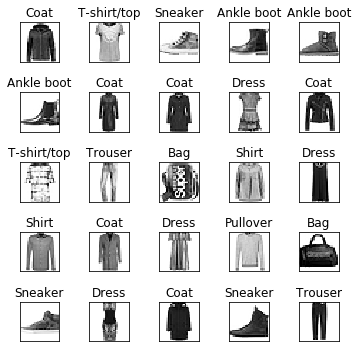

In [3]:
# 이미지 샘플 보기 (진짜 그림으로 보기)

label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

row = 5
col = 5
fig=plt.figure(figsize=(row, col))

for i in range(row*col):
    image = fashion_mnist.train.images[i].reshape(28,28)
    label = np.argmax(fashion_mnist.train.labels[i])
    
    sbp = fig.add_subplot(row, col, i+1)
    sbp.set_title(label_dict[label])
    sbp.set_xticks([])
    sbp.set_yticks([])
    plt.imshow(image, cmap='Greys')
fig.tight_layout()

# Tensorflow로 코드 짜기
## 텐서(Tensor)란?
https://www.tensorflow.org/programmers_guide/tensors

* Tensor: A tensor is a generalization of vectors and matrices to potentially higher dimensions.
* Rank: Tensor의 차원 수  
0: Scalar (magnitude only)  
1: Vector (magnitude and direction)  
2: Matrix (table of numbers)  
3: 3-Tensor (cube of numbers)  
n: n-Tensor (you get the idea)  
* Shape: Tensor의 사이즈  
Higher-rank Tensors, similarly, consist of an n-dimensional array. For example, during image processing, many tensors of rank 4 are used, with dimensions corresponding to example-in-batch, image width, image height, and color channel.

## Tensorflow 코드의 대강의 흐름

1. 입력 X로부터 Hidden Layer를 거쳐 Output Y^가 나오는 인공 신경망 그림을 머릿속에 그려봅니다.
2. Tensorflow는 코드는 
  * 네트워크의 생김새와 연산을 정의하는 부분과
  * 정의한 네트워크에 데이터를 feeding하여 실제로 연산을 수행하는 2단계로 크게 나눌 수 있습니다.
3. 네트워크의 생김새와 연산을 정의해봅시다.
  * 입력 X (의류 이미지 784 픽셀 벡터)가 들어갈 자리와 정답 라벨 Y가 들어갈 자리를 만들어 줍니다.
    * tf.placeholder
      * plcaeholder로 선언한 값들은, 나중에 실제 학습을 할 때 내가 'feed' 혹은 '주입' 시켜주는 값입니다.
  * 히든 레이어에 필요한 Weight, Bias를 정의합니다.  
    각 변수의 Shape를 잘 맞추어야 합니다. (행렬 연산이 가능하도록)
    * tf.Variable
      * tf.Variable(텐서 초기 값)
      * tf.Variable(텐서 초기 값, name='변수명')
    * tf.get_variable
      * tf.get_variable("변수명", initializer=텐서 초기 값 or 초기화 함수)
  * 히든 레이어의 연산을 정의합니다.
    * 결과 = Activation(이전_레이어_결과 * Weight + Bias)
      * tf.matmul
      * tf.add
      * tf.nn.relu 등 tf.nn에 있는 activation 함수들 사용
  * Error 연산을 정의합니다.
    * error = ...
      * tf.nn.softmax_cross_entropy_with_logits_v2
        * Output Tensor를 입력 받아 Error 값을 Tensor로 출력
    * 또는 tf.수학_함수들 사용하여 직접 계산
  * Optimizer 연산을 정의합니다.
    * optimizer = ...
      * tf.train.GradientDescentOptimizer
      * tf.train.AdamOptimizer 등
  * Accuracy나 추가로 계산하고 싶은 연산이 있다면 추가 정의
    * accuracy = ...
4. 정의한 네트워크에 데이터를 feeding하여 실제로 연산을 수행하는 단계입니다.
  * Tensorflow의 Global 변수 초기화
    * tf.global_variables_initializer()
  * Tensorflow 세션 생성: 학습을 위한 세션. 세션 안에서 학습한 Weight들이 공유된다.
    * tf.Session()
  * 전체 batch에서 mini-batch만큼 학습 데이터셋을 가져와서 학습(Optimizer 연산) 수행
    * sess.run(optimizer, feed_dict={X: 학습셋, Y: 정답셋}
      * feed_dict에 넣어준 값이 앞서 정의한 Placeholder에 들어가게 됨
  * 앞 과정을 Epoch 만큼 반복
    * 한 Epoch이 끝날 때 마다 Validation 데이터셋을 가지고 Error, Accuracy 측정
      * sess.run([error, accuracy], feed_dict={X: Validation_셋, Y: Validaiton_정답셋}
      
      
덧)  
예제 코드를 보다보면 tf.name_scope, tf.variable_scope 같은 것이 많이 나옵니다.  
일단 이 아이들은 tensor board에 신경망 구조(graph)를 도식화 할때 변수와 연산명을 grouping 할 때 쓴다고만 알고 넘어가겠습니다.  
variable_scope 같은 경우는 Variable Sharing의 목적이 있는데,  
이건 다음 번에 실습 코드를 def나 class 단위로 추상화 하면서 설명 드리도록 하겠습니다.

## NN 모델 만들기
인공 신경망의 layer 수, layer 당 unit 수, activation 함수, optimizer 선택, learning rate 변경, 가중치(weight) 초기화나 과적합(overfitting) 회피 기법들을 다양하게 사용해보세요.
아래는 지금 예제의 상태입니다.

* Input Layer     : 784 Neurons
* Hidden Layer #1 : 128 Neurons (W: 정규분포 평균 0 & 표준편차 0.01, B: 0, Activation: ReLU)
* Hidden Layer #2 : 128 Neurons (W: 정규분포 평균 0 & 표준편차 0.01, B: 0, Activation: ReLU)
* Output Layer    : 10 Neurons (W: 정규분포 평균 0 & 표준편차 0.01, B: 0, Activation: Softmax)

## 학습 효율 (학습 속도, Overfitting 회피 등)을 높이기 위한 기법들 (1)
#### Layer 및 Layer 당 Neuron 개수 조정
#### Initializer
```python
# Xavier
W1 = tf.get_variable("W1",
                     shape=[784, 128],
                     dtype=tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())

# 정규 분포
W1 = tf.get_variable("W1",
                     shape=[784, 128],
                     dtype=tf.float32,
                     initializer=tf.tf.random_normal_initializer(mean=0.0, stddev=1.0))

# 내가 직접 초기 값 전달
B1 = tf.get_variable("B1", initializer=tf.zeros([128]))

# tf.Variable을 그냥 쓰고 싶다면...
initializer = tf.contrib.layers.xavier_initializer()
W1 = tf.Variable(initializer(shape=[784, 128], dtype=tf.float32), name='W1')
```

#### Drop Out
원하는 레이어마다 추가
```python
is_training = tf.placeholder(tf.bool)
keep_prob = tf.placeholder(tf.float32)

H2 = tf.nn.relu(tf.add(tf.matmul(H1, W2), B2))
H2 = tf.where(is_training,
              tf.nn.dropout(H2, keep_prob), # keep_prob = 뉴런 사용률
              H2) 
```

덧) tf.where(condition, x, y)는 condition이 True이면 x를 실행, False이면 y를 실행하여 그 실행 결과 Tensor를 리턴

#### Batch Normalization
원하는 레이어마다 추가
```python
H1 = tf.layers.batch_normalization(H1, training=is_training)
```

In [4]:
# >>>>>>>>>> LAYERS (Weight, Bias, Activation)

# INPUT LAYER
# : MNIST 이미지는 28*28 = 784개의 feature 
# mini-batch 1회당 N개의 이미지(row) * 784 벡터(column)를 처리할 것이기 때문에 shape = [None, 784]
X = tf.placeholder(tf.float32, [None, 784], name='X')

# 결과 값
# : 0~9 10가지 분류로 만듬
# mini-batch 1회당 N개의 이미지(row) * 10 벡터(column)를 처리할 것이기 때문에 shape = [None, 10]
Y = tf.placeholder(tf.float32, [None, 10], name='Y')

# 기타 학습 시 feed할 설정 값
# drop out시 weight 사용률
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

# 학습/예측 여부
is_training = tf.placeholder(tf.bool, name='is_training')

In [5]:
# Hidden Layers
# 주의!: tf.get_variable은 같은 변수명이 없으면 생성, 있으면 실패합니다. 이미 만든 변수를 덮어쓰지 않음.
# 원래 사용 목적이 기존에 만든 변수 가져오기: tf.get_variable("W1") 이렇게만 하면 기존에 만든 변수를 가져오는 것.
# 그래서 개발중에 이 셀을 반복해서 실행하면 'Variable layer1/W1 already exists'라고 에러가 납니다.
# 번거롭지만 kerner restart 해주셔야 해요. 
# 아니면 그냥 무조건 새로 정의하는 tf.Variable을 쓰셔도 됩니다.
with tf.variable_scope('layer1'):
    W1 = tf.get_variable("W1",
                     shape=[784, 128],
                     dtype=tf.float32,
                     initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    B1 = tf.get_variable("B1", initializer=tf.zeros([128]))
    H1 = tf.nn.relu(tf.add(tf.matmul(X, W1), B1))
    tf.summary.histogram('W1', W1)

with tf.variable_scope('layer2'):
    W2 = tf.get_variable("W2",
                     shape=[128, 128],
                     dtype=tf.float32,
                     initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    B2 = tf.get_variable("B2", initializer=tf.zeros([128]))
    H2 = tf.nn.relu(tf.add(tf.matmul(H1, W2), B2))
    tf.summary.histogram('W2', W2)
    
# Output Layer
with tf.variable_scope('output'):
    W3 = tf.get_variable("W3", 
                     shape=[128, 10], 
                     dtype=tf.float32,
                     initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    B3 = tf.get_variable("B3", initializer=tf.zeros([10]))
    prediction = tf.add(tf.matmul(H2, W3), B3)
    tf.summary.histogram('W3', W3)

## Error Funciton
## 학습 효율을 높이기 위한 기법들 (2)
#### L2 Regularization
```python
# cross entropy with logits
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = prediction, labels = Y))

# l2 regularization
vars = tf.trainable_variables() # 정의된 모든 weight들
beta = 0.001
l2_loss = tf.add_n([ tf.nn.l2_loss(v) for v in vars ]) * beta

## cross entropy + l2 regularization
error = error + l2_loss
```

덧) tf.add와 tf.add_n의 차이.  
* tf.add(x, y): 입력 받은 두 텐서, x와 y 텐서를 element-wise하게 합.  
* tf.add_n(list_of_tensors): 텐서 리스트를 입력받아, 리스트 안의 텐서 N개를 element-wise하게 합.

In [6]:
# >>>>>>>>>> ERROR(COST, LOSS) FUNCTION: Cross Entropy, MSE, ...
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2

with tf.name_scope('error'):
    # cross entropy with logits
    # 학습 하다가 error가 NaN이 되는 이슈 -> 해결방법: cross entropy 직접 계산하지 말 것
    # ㄴ https://github.com/tensorflow/tensorflow/issues/2462#issuecomment-220842098
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = prediction, labels = Y))

    # TensorBoard에 기록할 수치 등록 
    tf.summary.scalar('error', error)

## Optimizer - 학습 알고리즘

## 학습 효율을 높이기 위한 기법들 (3)

#### Learning Rate 조정
learning_rate = ...

#### 학습 알고리즘 선택 (SGD, Adam, RMSProp, ...)
optimizer = ...

In [7]:
# >>>>>>>>>> OPTIMIZER (by Backpropagation & Gradient Descent & ...)

with tf.name_scope('optimizer'):
    learning_rate = 0.001
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

In [8]:
# >>>>>>>>>> ACCURACY 계산

with tf.name_scope('accuracy'):
    # 예측 결과 텐서 prediction 과 정답 라벨 텐서를 비교하여
    is_correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    # 일치하는 것의 비율 계산
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    
    # TensorBoard에 기록할 수치 등록
    tf.summary.scalar('accuracy', accuracy)

## NN 학습 (by mini-batch)
## 학습 효율을 높이기 위한 기법들 (4)
#### mini-batch 개수 조정
#### epoch 횟수 조정

## TensorBoard 보기
학습을 돌린 뒤에 터미널을 열고 아래 명령 실행하시면 TensorBoard가 뜹니다.  
http://localhost:6006 으로 접속하세요.
```
$ cd fashion_mnist  
$ tensorboard --logdir=./logs
```

#### * 주의!: 새로 학습을 돌리는 경우에는 먼저 ./logs 폴더를 삭제해주세요. 안그러면 지난 번 학습 결과 그래프랑 겹쳐서 나와버립니다.

In [9]:
# 미니 배치의 크기 (이미지 수)
mini_batch_size = 128
# 배치 횟수 (몇 번의 배치를 돌아야 1 Epoch이 완성 되는가)
batch_count = int(fashion_mnist.train.num_examples / mini_batch_size)
# Epoch 횟수
epoch_count = 100 
# Validation 배치의 크기 (이미지 수)
valid_batch_size = 5000
# Drop Out시 Weight 사용율
keep_prob_val = 0.8


# >>>>>>>>>> 학습 세션 시작!
with tf.Session() as sess: 
    # 세션 초기화
    saver = tf.train.Saver(tf.global_variables())
    sess.run(tf.global_variables_initializer())

    # TensorBoard에 기록할 항목들을 merge 하고 실제 내용을 기록할 FileWriter를 생성
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('./logs/train', sess.graph)
    valid_writer = tf.summary.FileWriter('./logs/valid', sess.graph)
    
    for epoch in range(epoch_count):
        # Epoch 시작 --------------------
        err_val = 0.0
        acc_val = 0.0
        
        for i in range(batch_count):
            # 미니 배치 시작 --------------

            # mnist.train.next_batch: 최초 1회 training set을 shuffle한 다음 mini_batch_size 만큼 반환
            train_x, train_y = fashion_mnist.train.next_batch(mini_batch_size)

            if i < batch_count-1:
                # 평소에는 optimizer(gradient descent), error, accuracy만 계산
                _, err_val, acc_val = sess.run([optimizer, error, accuracy], 
                                               feed_dict={
                                                   X: train_x, 
                                                   Y: train_y, 
                                                   is_training: True, 
                                                   keep_prob: keep_prob_val})
            else:
                # 마지막 미니 배치때에만 summary 항목도 계산
                _, err_val, acc_val, summary = sess.run([optimizer, error, accuracy, merged], 
                                                        feed_dict={
                                                            X: train_x, 
                                                            Y: train_y, 
                                                            is_training: True, 
                                                            keep_prob: keep_prob_val})
                train_writer.add_summary(summary, epoch)
            
            # 미니 배치 끝 ---------------
        
        # Epoch 검증: Validation 데이터셋 예측하기    
        valid_x, valid_y = fashion_mnist.validation.next_batch(valid_batch_size)
        valid_err_val, valid_acc_val, summary = sess.run([error, accuracy, merged], 
                                                         feed_dict={
                                                             X: valid_x, 
                                                             Y: valid_y, 
                                                             is_training: False,
                                                             keep_prob: 1.0})
        valid_writer.add_summary(summary, epoch)

        print('Epoch:', '%04d' % (epoch + 1))
        print('Train Error = {:.4f}, Valid Error: {:.4f}, Train Accuracy: {:.4f}, Valid Accuracy: {:.4f}'.format(
            err_val,
            valid_err_val, 
            acc_val,
            valid_acc_val))
        
        # Epoch 끝  --------------------
        
    saver.save(sess, './model/fashion_mnist.chkp')
# tf.Session 끝

Epoch: 0001
Train Error = 2.3025, Valid Error: 2.3025, Train Accuracy: 0.0781, Valid Accuracy: 0.1148
Epoch: 0002
Train Error = 2.3022, Valid Error: 2.3023, Train Accuracy: 0.2031, Valid Accuracy: 0.1370
Epoch: 0003
Train Error = 2.3022, Valid Error: 2.3022, Train Accuracy: 0.1875, Valid Accuracy: 0.1492
Epoch: 0004
Train Error = 2.3021, Valid Error: 2.3021, Train Accuracy: 0.1406, Valid Accuracy: 0.1562
Epoch: 0005
Train Error = 2.3018, Valid Error: 2.3020, Train Accuracy: 0.1719, Valid Accuracy: 0.1608
Epoch: 0006
Train Error = 2.3018, Valid Error: 2.3018, Train Accuracy: 0.1562, Valid Accuracy: 0.1630
Epoch: 0007
Train Error = 2.3015, Valid Error: 2.3016, Train Accuracy: 0.1719, Valid Accuracy: 0.1646
Epoch: 0008
Train Error = 2.3015, Valid Error: 2.3014, Train Accuracy: 0.1875, Valid Accuracy: 0.1642
Epoch: 0009
Train Error = 2.3011, Valid Error: 2.3012, Train Accuracy: 0.1719, Valid Accuracy: 0.1646
Epoch: 0010
Train Error = 2.3008, Valid Error: 2.3010, Train Accuracy: 0.2188, Val

Epoch: 0082
Train Error = 0.7297, Valid Error: 0.8386, Train Accuracy: 0.7422, Valid Accuracy: 0.6946
Epoch: 0083
Train Error = 0.8815, Valid Error: 0.8371, Train Accuracy: 0.6641, Valid Accuracy: 0.6912
Epoch: 0084
Train Error = 0.8061, Valid Error: 0.8311, Train Accuracy: 0.7422, Valid Accuracy: 0.6966
Epoch: 0085
Train Error = 0.9609, Valid Error: 0.8290, Train Accuracy: 0.6172, Valid Accuracy: 0.6988
Epoch: 0086
Train Error = 0.7273, Valid Error: 0.8252, Train Accuracy: 0.7500, Valid Accuracy: 0.7058
Epoch: 0087
Train Error = 0.7210, Valid Error: 0.8220, Train Accuracy: 0.7109, Valid Accuracy: 0.7030
Epoch: 0088
Train Error = 0.8072, Valid Error: 0.8193, Train Accuracy: 0.7344, Valid Accuracy: 0.7100
Epoch: 0089
Train Error = 0.7800, Valid Error: 0.8151, Train Accuracy: 0.7344, Valid Accuracy: 0.7072
Epoch: 0090
Train Error = 0.9475, Valid Error: 0.8115, Train Accuracy: 0.7109, Valid Accuracy: 0.7128
Epoch: 0091
Train Error = 0.7859, Valid Error: 0.8083, Train Accuracy: 0.7266, Val

## 그림 확인 하기

INFO:tensorflow:Restoring parameters from ./model/fashion_mnist.chkp


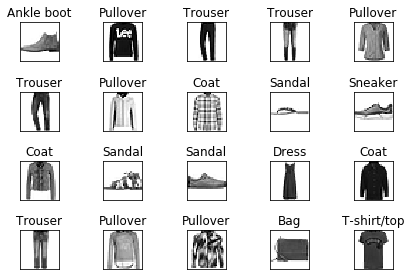

In [10]:
from math import ceil, floor

test_count = 20 # 5의 배수로 해주세요
row = floor(test_count/col)
col = 5

# 검증용으로 사용할 이미지 꺼내어 놓기
test_x = fashion_mnist.test._images[:test_count]
test_y = fashion_mnist.test._labels[:test_count]

with tf.Session() as sess: 
    # 세션 초기화
    saver = tf.train.Saver(tf.global_variables())
    ckpt = tf.train.get_checkpoint_state('./model')
    saver.restore(sess, ckpt.model_checkpoint_path)

    test_pred, test_err_val, test_cc_val = sess.run([prediction, error, accuracy], 
                                                     feed_dict={
                                                         X: test_x, 
                                                         Y: test_y, 
                                                         is_training: False,
                                                         keep_prob: 1.0})
    
    fig = plt.figure()
    for i in range(test_count):
        sbp = fig.add_subplot(row, col, i + 1)
        sbp.set_xticks([])
        sbp.set_yticks([])
        sbp.set_title(label_dict[np.argmax(test_pred[i])])
        sbp.imshow(fashion_mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)
    fig.tight_layout()
    plt.show()